In [108]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.table.plotting import table


ModuleNotFoundError: No module named 'pandas.table'

In [60]:
#CSV path files 

csv_2022="Sources/tmdb_movie_final_2022_budgets.csv"
csv_2021="Sources/tmdb_movie_final_2021_budgets.csv"
csv_2020="Sources/tmdb_movie_final_2020_budgets.csv"
csv_2019="Sources/tmdb_movie_final_2019_budgets.csv"
csv_2018="Sources/tmdb_movie_final_2018_budgets.csv"
csv_2017="Sources/tmdb_movie_final_2017_budgets.csv"

pre_covid="Sources/tmdb_movie_precovid.csv"
covid="Sources/tmdb_movie_covid.csv"

In [61]:
# creating dataFrames for each csv files
tmdb_2022_df=pd.read_csv(csv_2022, encoding="ISO-8859-1").set_index("id")
tmdb_2021_df=pd.read_csv(csv_2021, encoding="ISO-8859-1").set_index("id")
tmdb_2020_df=pd.read_csv(csv_2020, encoding="ISO-8859-1").set_index("id")
tmdb_2019_df=pd.read_csv(csv_2019, encoding="ISO-8859-1").set_index("id")
tmdb_2018_df=pd.read_csv(csv_2018, encoding="ISO-8859-1").set_index("id")
tmdb_2017_df=pd.read_csv(csv_2017, encoding="ISO-8859-1").set_index("id")

covid=pd.read_csv(covid, encoding="ISO-8859-1").set_index("id")
pre_covid=pd.read_csv(pre_covid, encoding="ISO-8859-1").set_index("id")


In [62]:
tmdb_2022_df_clean= tmdb_2022_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
tmdb_2021_df_clean= tmdb_2021_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
tmdb_2020_df_clean= tmdb_2020_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
tmdb_2019_df_clean= tmdb_2019_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
tmdb_2018_df_clean= tmdb_2018_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
tmdb_2017_df_clean=  tmdb_2017_df[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]

covid_df=covid[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]
pre_covid_df=pre_covid[['original_title','original_language','Country','year','release_date','Genres','popularity','Budget','Revenue','imdb_id']]

In [124]:
cvoid_df=pd.DataFrame(covid_df)
covid_df.count()

pre_covid_df=pd.DataFrame(pre_covid_df)
number_of_movie_relased_Covid=covid_df["original_title"].count()
number_of_movie_relased_pre_Covid=pre_covid_df["original_title"].count()
print(f'number of movie released before Covid: {number_of_movie_relased_pre_Covid}')
print(f'number of movie released during Covid: {number_of_movie_relased_Covid}')

number of movie released before Covid: 3077
number of movie released during Covid: 9690


In [63]:
#Group by country during covid, create dataframe for it 

Country= covid_df.groupby(['Country']).sum()
country_df=pd.DataFrame(Country)
country_df




,year,popularity,Budget,Revenue
Country,,,,
Albania,12126,47.328,5.400000e+07,0.000000e+00
Angola,6063,23.262,7.800000e+06,0.000000e+00
Antarctica,2020,1.252,3.000000e+04,0.000000e+00
Argentina,123272,349.856,8.239141e+07,1.316062e+08
Australia,426448,2896.011,1.481713e+09,4.030730e+09
...,...,...,...,...
United States of America,6895569,84614.394,6.779890e+10,2.332003e+11
Uruguay,6060,2.728,1.640000e+05,1.886000e+04
Venezuela,10103,18.222,3.600011e+06,0.000000e+00


In [64]:
#groupby by country before Covid create Data Frame for it 
Country_pre=pre_covid_df.groupby(['Country']).sum()
country_df_pre=pd.DataFrame(Country_pre)
country_df_pre

,year,popularity,Budget,Revenue
Country,,,,
Albania,2018,7.734,2000000,0
Argentina,52457,82.815,23331790,35117021
Australia,90796,597.505,185033407,796813580
Austria,16142,41.832,36121200,8712522
Bangladesh,4035,5.432,3000000,0
...,...,...,...,...
United States of America,2166950,14760.645,17286119422,67497293333
Uruguay,4036,2.125,14000,18860
Venezuela,8070,13.276,2400020,0


In [138]:

# sum of budget based on contry during covid
bud_sum_covid=country_df["Budget"].sum()
# sum of revenue based on country during covid
rev_sum_covid=country_df["Revenue"].sum()

# sum of budget based on contry Pre covid
bud_sum_precovid=country_df_pre["Budget"].sum()
bud_sum_precovid
# sum of revenue based on country Pre  covid
rev_sum_precovid=country_df_pre["Revenue"].sum()

# craeting a dic for budget and revnue based on Covid time and Pre covid time 
total_bud_rev=pd.DataFrame ({
    "Duration":["Covid","Pre_Covid"],
    "Budget":[bud_sum_covid,bud_sum_precovid],
    "Revenue":[rev_sum_covid,rev_sum_precovid]
})


#
#set the index 
total_index= total_bud_rev.set_index("Duration")
total_index

,Budget,Revenue
Duration,,
Covid,1.256450e+11,3.902954e+11
Pre_Covid,3.384733e+10,1.208383e+11


<IPython.core.display.Javascript object>


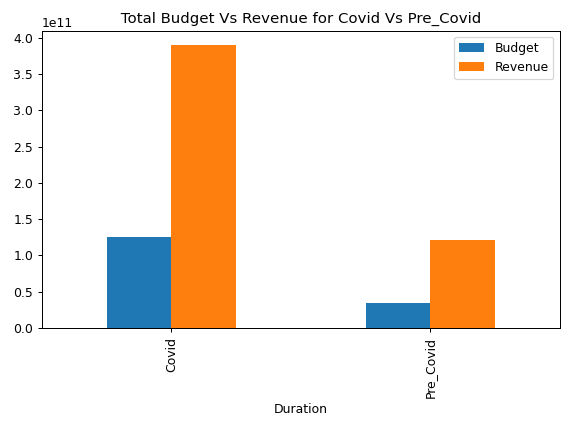

In [140]:
# cretae bar chart for during Cvoid and before Covid based on Budget and revenue
bar_chart=pd.DataFrame(total_index)
bar_chart=bar_chart.plot(kind="bar")


bar_chart.set_title(" Total Budget Vs Revenue for Covid Vs Pre_Covid ")

plt.tight_layout()
#saving the chart
plt.savefig("../project figures/Total Budget Vs Revenue for Covid Vs Pre_Covid.png")

In [91]:
#total_bud_rev["Budget"]= total_bud_rev["Budget"].map("${:,}".format)
#total_bud_rev["Revenue"]= total_bud_rev["Revenue"].map("${:,}".format)

total_bud_rev.set_index("Duration")


,Budget,Revenue
Duration,,
Covid,"$125,645,049,257.0","$390,295,360,771.0"
Pre_Covid,"$33,847,325,827.0","$120,838,297,796.0"


In [106]:
#Profits 

Total_profit_covid= total_index.loc['Covid','Revenue']-total_index.loc['Covid','Budget']
Total_profit_pre_covid=total_index.loc['Pre_Covid','Revenue']-total_index.loc['Pre_Covid','Budget']


#incresment in Budget before covid and after covid
Increase_bud_= total_index.loc['Covid','Budget']/total_index.loc['Pre_Covid','Budget']

Increase_rev_=total_index.loc['Covid','Revenue']/total_index.loc['Pre_Covid','Revenue']

Total_profit_covid
Total_profit_pre_covid

total_prfits=pd.DataFrame ({
    "Duration":["Covid","Pre_Covid"],
    "Profits":[Total_profit_covid,Total_profit_pre_covid],
    
}).set_index("Duration")


total_prfits




,Profits
Duration,
Covid,2.646503e+11
Pre_Covid,8.699097e+10


<IPython.core.display.Javascript object>


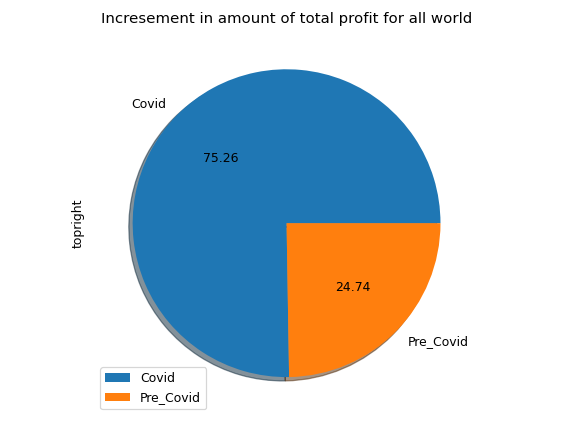

In [149]:
#total Profit pie
profit_pie=total_prfits.plot(kind="pie",y="Profits",
                             autopct='%.2f',
                                                                            label='topright',
                                                                            shadow=True,
                                                                            radius=1
)
plt.legend(loc="lower left")

plt.title("Incresement in amount of total profit for all world")
plt.tight_layout()

#saving chart
plt.savefig("../project figures/Incresement in amount of total profit for all world.png")

<IPython.core.display.Javascript object>


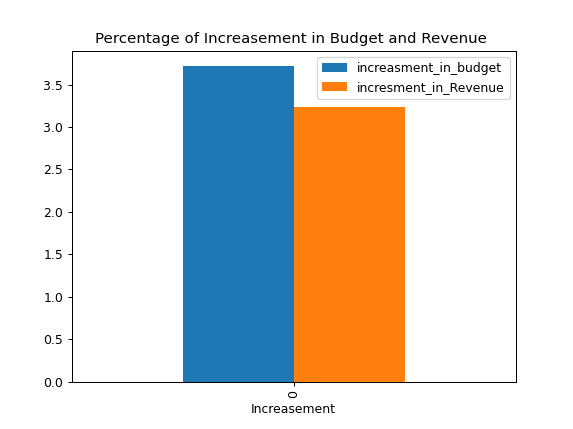

In [160]:
# increasement in Budget 
Incresment_bud_rev=pd.DataFrame({
    "increasment_in_budget":[Increase_bud_],
    "incresment_in_Revenue":[Increase_rev_]
    
})

Incresment_bud_rev.plot(kind="bar")
plt.xlabel("Increasement")
plt.title("Percentage of Increasement in Budget and Revenue ")

#saving chart
plt.savefig("../project figures/Percentage of Increasement in Budget and Revenue.png")

In [147]:
# Canada total Budget and revenue Before and after Covid
##########################################################

canada_covid_bud = country_df.loc["Canada","Budget"]
canada_precovid_bud = country_df_pre.loc["Canada","Budget"]
canada_covid_Revenue = country_df.loc["Canada","Revenue"]
canada_precovid_Revenue = country_df_pre.loc["Canada","Revenue"]


canada_table=pd.DataFrame({
    "Duration":["Covid","Pre_Covid"],
    "Budget":[canada_covid_bud,canada_precovid_bud],
    "Revenue":[canada_covid_Revenue,canada_precovid_Revenue]
}).set_index("Duration")
canada_table

,Budget,Revenue
Duration,,
Covid,8.277610e+09,1.715063e+10
Pre_Covid,1.860853e+09,3.762185e+09


<IPython.core.display.Javascript object>


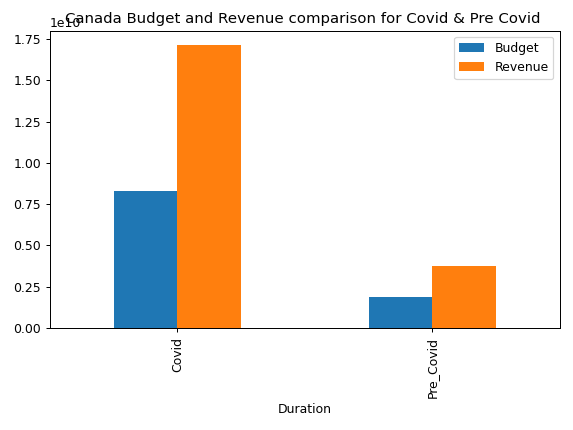

In [161]:

#### CANDA Budget and Revenue 
canada_table.plot(kind="bar")
plt.title("Canada Budget and Revenue comparison for Covid & Pre Covid ")
plt.tight_layout()
#saving chart
plt.savefig("../project figures/Percentage of Increasement in Budget and Revenue.png")

,Budget,Revenue
Duration,,
Covid,8.277610e+09,1.715063e+10
Pre_Covid,1.860853e+09,3.762185e+09
